# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


Linear Regression is a prediction Y (What to predict) of (Values/data) X using a single straight line of the form (y = ax + b). Polynomial Regression is a prediction using the a k-order derivate of a polynimal to allow a line to curve to best fit X to predict Y.

Overfitting is the when the model has overtrained (gotten too used to the data) and cannot make accurate predictions outside of the training data.
Underfitting is when the model after being trained cannot predict accurately the data or just does not find a trend/line that best fits X.


### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Logistic Regression is a classfication model that by predicting Y by taking X all that have binary labels (either 0 or 1) and passing them through a polynomial function (for example y = ax + b) and then passing it through a sigmoid function so that the prediction will either come out between 0 and 1.

Essentially, Linear Support Vector Machine is classification model to find a line such that the support vectors (closest points to the line) create the biggest margin between the classes. To allow us to separate data that is merged together, slack variables are used to calculate the error when a point/value is on the incorrect side where the best line is the one with the least amount of error. The Linear Support Vector Machine uses a linear line (y = ax + b) function to create the line. Other kernels would create other forms of lines or shapes to separate the points/data.

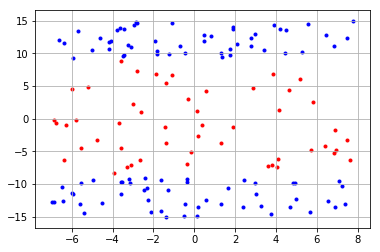

In [50]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

num_points = 100
x_r = [random.uniform(-7, 8) for i in range(50)]
y_r = [random.uniform(-9, 9) for i in range(50)]
x_b_1 = [random.uniform(-7, 8) for i in range(50)]
y_b_1 = [random.uniform(9,15) for x in x_b_1]
x_b_2 = [random.uniform(-7,8) for i in range(50)]
y_b_2 = [random.uniform(-15,-9) for x in x_b_2]

plt.figure()
plt.scatter(x_r, y_r, marker = '.', c='r')
plt.scatter(x_b_1, y_b_1, marker = '.', c='b')
plt.scatter(x_b_2, y_b_2, marker = '.', c='b')
plt.grid()

# This is not linearly separable, but by using a non-linear svm that maps the points/data
# into another space then it would be separable

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
A supervised learning algorithm is an algorithm that has X input such that there is an associated output Y where it can be compared to the Y prediction. Essentially, the prediction of the model can have a fixed size. On the other hand, an unsupervised learning algorithm has X input, but not Y output, where the output is not fixed.

K-NN is a supervised learning algorithm because regardless of label it will classify them without knowledge of them. The lazy in K-NN means that there is no training-time because all of the training data will stay during the testing/prediction phase as well. Instead, K-NN uses a similarity function/metric that will compare the input or point that you want to predict to the closest points where the points to compare are numbered at K. Based on the similarity function/metric and the labels of its neighbours it will then return the label that occurs the most in the neighbours. K-NN can be used to classify a credits system or to predict who you will vote for. K-NN in essence compares you to your neighbours when looking to make a prediction about you, which makes sense because usually your neighbours resemble you, unless you are an outlier.

Algorithm: 
C = inputs / points to predict
K = number of neighbours to check
For each point:
    Find the K most closest points by distance (neighbours)
    Identify the labels/class of each point
    Sum the counts of each class
    Set the class/label of the point
Return [(neighbours, class)]


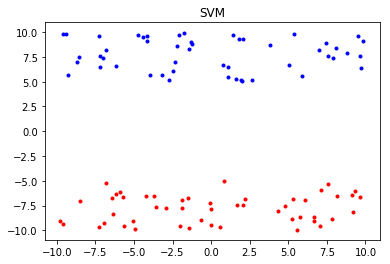

In [145]:
# SVM not KNN
x_r = [random.uniform(-10, 10) for i in range(50)]
y_r = [random.uniform(-10, -5) for i in range(50)]
x_b = [random.uniform(-10, 10) for i in range(50)]
y_b = [random.uniform(5,10) for i in range(50)]

plt.figure()
plt.title("SVM")
plt.scatter(x_r, y_r, marker = '.', c='r')
plt.scatter(x_b, y_b, marker = '.', c='b')
plt.show()

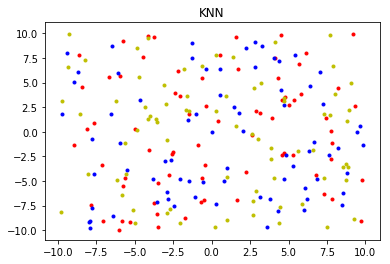

In [147]:
# KNN not SVM
x_r = [random.uniform(-10, 10) for i in range(75)]
y_r = [random.uniform(-10, 10) for i in range(75)]
x_b = [random.uniform(-10, 10) for i in range(75)]
y_b = [random.uniform(-10,10) for i in range(75)]
x_y = [random.uniform(-10,10) for i in range(75)]
y_y = [random.uniform(-10,10) for i in range(75)]

plt.figure()
plt.title("KNN")
plt.scatter(x_r, y_r, marker = '.', c='r')
plt.scatter(x_b, y_b, marker = '.', c='b')
plt.scatter(x_y, y_y, marker = '.', c='y')
plt.show()

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [148]:
# Implement kNN by hand. It might be useful to store all distances in one array/list
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import operator

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# Preview dataset
iris_df.head()

msk = np.random.rand(len(iris_df)) < 0.8
train = iris_df[msk]
test = iris_df[~msk]

test_X = test.drop(columns = "target")
test_Y = test.target

target_names = list(iris.target_names)


In [151]:
## YOUR CODE HERE
def euclideanDistance(point, point2, length):
    distance = 0
    # get the distance for each column
    for x in range(length):
        distance += np.square(point[x] - point2[x])
    return np.sqrt(distance)

def knn(train_set, test, k):
    distances = {}
    sort = {}
    length = test.shape[0]
    # Get the distance from each point
    for x in range(len(train_set)):
        dist = euclideanDistance(test, train_set.iloc[x], length)
        distances[x] = dist
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # get K closest neighbours
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    class_labels = {}
    # For each neighbour
    for x in range(len(neighbors)):
        # Get labels
        label = train_set.iloc[neighbors[x]][-1]
        #Add label to count of labels
        if label in class_labels:
            class_labels[label] += 1
        else:
            class_labels[label] = 1
    #Sorts the classes based on count
    classes = sorted(class_labels.items(), key=operator.itemgetter(1), reverse=True)
    #Returns the most counted votes
    return(classes[0][0], neighbors)

In [152]:
k = 6

for index in range(len(test)):
    result, neigh = knn(train, test_X.iloc[index], k)
    print(target_names[int(result)])
    print(neigh)


setosa
[0, 12, 4, 29, 19, 34]
setosa
[13, 6, 36, 34, 11, 23]
setosa
[35, 2, 7, 31, 20, 3]
setosa
[27, 1, 21, 37, 20, 33]
setosa
[1, 27, 33, 21, 2, 3]
setosa
[34, 36, 12, 0, 19, 6]
setosa
[34, 12, 36, 0, 19, 32]
setosa
[27, 1, 21, 33, 20, 37]
setosa
[19, 0, 29, 12, 4, 37]
setosa
[27, 1, 21, 37, 20, 33]
setosa
[12, 0, 4, 37, 29, 19]
setosa
[34, 32, 36, 18, 17, 16]
versicolor
[38, 63, 58, 45, 50, 41]
versicolor
[55, 71, 94, 41, 95, 42]
versicolor
[59, 65, 72, 46, 66, 60]
versicolor
[72, 69, 70, 65, 66, 67]
versicolor
[60, 66, 61, 40, 69, 72]
versicolor
[71, 48, 72, 56, 70, 65]
virginica
[63, 110, 58, 81, 100, 91]
versicolor
[48, 71, 42, 55, 51, 70]
versicolor
[72, 69, 66, 70, 65, 60]
versicolor
[51, 42, 70, 65, 69, 67]
versicolor
[43, 53, 39, 48, 51, 95]
versicolor
[55, 71, 39, 43, 56, 48]
versicolor
[72, 69, 66, 70, 60, 40]
versicolor
[70, 65, 72, 69, 48, 42]
versicolor
[44, 68, 47, 59, 61, 60]
virginica
[105, 82, 89, 112, 62, 95]
virginica
[85, 96, 99, 110, 75, 100]
virginica
[110, 96, 

### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Bagging is done to improve accuracy and stability.
Bagging is to have multiple different models that take in the input data (X) where the ouputs of all of the models are averaged out if it is a regression problem, or voted by majority for classification. Bagging is used for regression and statistical classification. 

Boosting is done to improve single weak learners to strong learners.
Boosting is to iteratively/sequentially use models. First, a single model (Base) will take in the input data and the output will be tested. The error of the model will then be focused on to be improved on by the next model. This is repeated until there are no more algorithms, or if accuracy is high enough. 

Decision trees models are used mainly classication, but can be used for regression. A decision tree are multiple conditions that form a tree-like form. The leaves of the decision tree are the class labels in a classification problem where the previous conditions lead to that specific label.

Random Forest is an ensemble method of using decision trees by using Bagging. It then uses multiple decision trees to do majority voting or to average out the values.

Decision Tree

Pros:
- Understandable
- Compact and Fast
- Works for regression and classification
Cons:
- Not guaranteed to be optimal (greedy)
- Cannot handle complicated relationships between features
- Needs large amounts of data
Random Forest
Pros:
- Will not overfit
- Trains fast
- Runs efficiently on large datasets
Cons:
- Slow
- Difficult to Understand
- Mainly predictive, not descriptive

Random Forest alleviates the problem of overfitting that decision trees usually have. However Decision trees are much faster than random forests.

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

PCA also known as Principal Component Analysis is way of reducing the dimensions ofthe data. 
Algorithm:
- Find the mean vector
- Find the normalized vectors by using the mean vector
- Create the covariance matrix
- Compute the Eigen values and Eigen vectors
- Compute the Basis Vectors
- Represent each sample as a linear combination matrix

The eigenvectors represent the direction of the new subspace and the eigen values is the variance/magnitude of the eigenvector.

The mean is there to normalize the data because or else the values will explode.
 
An auto encoder is a neutral network that try to learn the representation of the input so that noise cannot affect it and dimensionality reduction can be done efficiently thus generating an encoding. From this encoding, a reconstruction will be recreated by trying to replicate it as close as possible. However, since it essentially a compressed version of the original input some of the data will be gone, therefore making the dimension reduced.

PCA is restricted to a linear map, while autoencoders can have nonlinear encoder/decoders. Therefore, autoencoders are better because they can find patterns that PCA cannot find. PCA is the same as an autoencoder only when an autoencoder is single layered.


### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [153]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/ana

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


Accuracy: 42.238267148014444


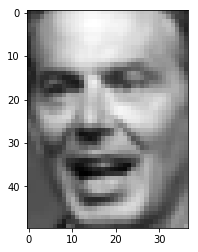

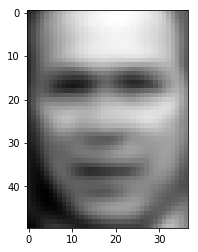

In [171]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')
plt.figure()
### insert your code here ###
pca = PCA(n_components=2)

X_encode = pca.fit_transform(X)
X_res = pca.inverse_transform(X_encode)

plt.imshow(X_res[1].reshape(h,w), cmap = 'gray')

msk = np.random.rand(len(X)) < 0.8
train_X = X_res[msk]
test_X = X_res[~msk]
train_y = y[msk]
test_y = y[~msk]
model = SVC(gamma=0.001)
model.fit(train_X, train_y)

pred = model.predict(test_X)

correct = 0
for x in range(len(pred)):
    if pred[x] == test_y[x]:
         correct+=1
            
correct = correct/len(pred) * 100
print("Accuracy: " + str(correct))


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

